## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 500)

/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading CSV Data

In [2]:
df = pd.read_csv('../data/WISDM_ar_v1.1_transformed.csv', na_values=["?"])
df.drop(["UNIQUE_ID"],axis=1, inplace=True)
df.head(10)

,user,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,RESULTANT,class
0,33,0.04,0.09,0.14,0.12,0.11,0.10,0.08,0.13,0.13,0.08,0.09,0.10,0.11,0.11,0.08,0.04,0.16,0.13,0.10,0.03,0.12,0.08,0.09,0.12,0.10,0.10,0.08,0.11,0.12,0.10,0,8.40,1.76,2075.00,293.94,1550.00,3.29,7.21,4.00,4.05,8.17,4.05,11.96,Jogging
1,33,0.12,0.12,0.06,0.07,0.11,0.10,0.11,0.09,0.12,0.10,0.12,0.11,0.07,0.10,0.13,0.13,0.06,0.11,0.10,0.04,0.11,0.11,0.11,0.09,0.12,0.10,0.11,0.10,0.07,0.08,0,7.62,1.43,1525.00,269.44,1233.33,4.23,6.88,4.05,5.43,8.19,5.43,12.05,Jogging
2,33,0.14,0.09,0.11,0.09,0.09,0.11,0.12,0.08,0.05,0.12,0.09,0.10,0.12,0.10,0.10,0.12,0.08,0.07,0.10,0.06,0.07,0.11,0.10,0.09,0.08,0.11,0.11,0.09,0.10,0.12,0,7.77,2.39,1766.67,248.65,1780.00,4.18,6.89,4.07,5.55,8.19,5.55,11.99,Jogging
3,33,0.06,0.10,0.09,0.09,0.11,0.07,0.12,0.10,0.14,0.14,0.12,0.08,0.11,0.10,0.10,0.11,0.11,0.10,0.08,0.11,0.10,0.10,0.11,0.10,0.09,0.07,0.12,0.14,0.07,0.11,0,9.57,0.49,2525.00,709.09,1380.00,2.26,4.13,2.49,2.87,4.95,2.87,10.69,Walking
4,33,0.12,0.11,0.10,0.08,0.10,0.14,0.10,0.11,0.08,0.07,0.10,0.11,0.07,0.09,0.10,0.11,0.10,0.11,0.14,0.09,0.10,0.09,0.11,0.10,0.11,0.11,0.08,0.09,0.14,0.10,0,9.76,0.51,1075.00,3300.00,1775.00,2.29,3.94,2.41,3.08,4.64,3.08,10.80,Walking
5,33,0.09,0.09,0.10,0.12,0.08,0.06,0.09,0.08,0.07,0.08,0.07,0.10,0.11,0.08,0.08,0.08,0.09,0.08,0.07,0.09,0.08,0.10,0.06,0.09,0.09,0.11,0.08,0.08,0.07,0.08,0,7.73,0.31,3125.00,1337.50,2675.00,2.00,3.39,1.94,3.13,4.95,3.13,8.63,Walking
6,33,0.12,0.12,0.12,0.13,0.15,0.11,0.08,0.09,0.06,0.03,0.10,0.11,0.09,0.10,0.10,0.12,0.09,0.11,0.10,0.10,0.13,0.08,0.11,0.12,0.08,0.07,0.09,0.10,0.11,0.13,0,9.20,1.19,4900.00,1058.33,1825.00,1.56,2.55,1.72,2.09,3.20,2.09,9.87,Upstairs
7,33,0.10,0.10,0.10,0.10,0.11,0.11,0.09,0.09,0.12,0.12,0.09,0.11,0.10,0.08,0.10,0.12,0.08,0.10,0.11,0.11,0.08,0.11,0.10,0.10,0.12,0.10,0.13,0.10,0.07,0.10,0,9.30,1.40,800.00,1275.00,2983.33,1.84,2.69,1.41,2.22,3.35,2.22,9.91,Upstairs
8,33,0.08,0.07,0.08,0.08,0.05,0.08,0.14,0.10,0.15,0.16,0.12,0.09,0.09,0.12,0.11,0.08,0.11,0.09,0.10,0.10,0.08,0.09,0.10,0.10,0.10,0.11,0.11,0.12,0.12,0.08,0,9.06,1.38,1283.33,845.45,1533.33,2.26,2.70,1.30,2.68,3.40,2.68,9.78,Upstairs
9,33,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.01,0.00,0.00,0.01,0.02,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0,0.39,-0.01,NaN,125.00,NaN,0.07,0.37,0.03,1.85,9.34,1.85,0.39,Upstairs


In [3]:
df.shape

(5418, 45)

## Visualizing the Number Values in each Classes

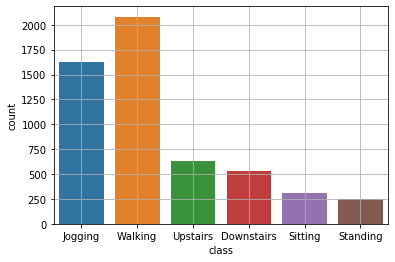

In [4]:
sns.countplot(df["class"])
plt.grid()
plt.show()

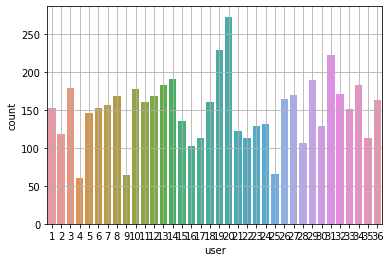

In [5]:
sns.countplot(df["user"])
plt.grid()
plt.show()

## transform non-numerical labels to numerical labels.

In [6]:
clEnc = LabelEncoder()
df["class"] = clEnc.fit_transform(df["class"])
clEnc.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

## getting corrilation of each atributes with Dependent Variables

In [7]:
corr_df = df.corr()[['user', 'class']] 
corr_df[((corr_df > 0.1) | (corr_df < -0.1))]

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

,user,class
user,1.000000,NaN
X0,NaN,NaN
X1,NaN,NaN
X2,NaN,NaN
X3,NaN,NaN
X4,NaN,NaN
X5,NaN,NaN
X6,NaN,NaN
X7,NaN,NaN
X8,NaN,NaN


## applying log transformation

In [8]:
df['XPEAK'] = np.log(df['XPEAK'])
df['YPEAK'] = np.log(df['YPEAK'])
df['ZPEAK'] = np.log(df['ZPEAK'])

## filling na values

In [9]:
df['XPEAK'] = df['XPEAK'].fillna(df['XPEAK'].mean())
df['YPEAK'] = df['YPEAK'].fillna(df['YPEAK'].mean())
df['ZPEAK'] = df['ZPEAK'].fillna(df['ZPEAK'].mean())

## spliting data into Dependent (X) and Independent (Y) Variables

In [10]:
X = df.drop(["user", "class"], 1)
# Y = df[["user", "class"]]
Y = df[["class"]]

# Oversampling

In [11]:
import numpy as np
from kmeans_smote import KMeansSMOTE

[print('Class {} has {} instances'.format(label, count))
 for label, count in zip(*np.unique(Y, return_counts=True))]

kmeans_smote = KMeansSMOTE(
    kmeans_args={
        'n_clusters': 100
    },
    smote_args={
        'k_neighbors': 10
    }
)
X_resampled, y_resampled = kmeans_smote.fit_sample(X, Y)

[print('Class {} has {} instances after oversampling'.format(label, count))
 for label, count in zip(*np.unique(y_resampled, return_counts=True))]

Class 0 has 528 instances
Class 1 has 1625 instances
Class 2 has 306 instances
Class 3 has 246 instances
Class 4 has 632 instances
Class 5 has 2081 instances


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class 0 has 2081 instances after oversampling
Class 1 has 2081 instances after oversampling
Class 2 has 2081 instances after oversampling
Class 3 has 2080 instances after oversampling
Class 4 has 2081 instances after oversampling
Class 5 has 2081 instances after oversampling


[None, None, None, None, None, None]

In [12]:
yy = pd.DataFrame(y_resampled, columns=['class'])

In [13]:
yy

,class
0,1
1,1
2,1
3,5
4,5
...,...
12480,4
12481,4
12482,4
12483,4


In [14]:
X_resampled.shape

(12485, 43)

In [15]:
dict(1- yy['class'].value_counts(normalize=True))

{5: 0.833319983980777,
 4: 0.833319983980777,
 2: 0.833319983980777,
 1: 0.833319983980777,
 0: 0.833319983980777,
 3: 0.8334000800961153}

In [16]:
trainX, testX, trainY, testY = train_test_split(X_resampled, y_resampled, test_size=.2, random_state=10)

In [17]:
testY

array([4, 2, 5, ..., 4, 3, 3])

In [18]:
from sklearn.metrics import accuracy_score

#Train the model
csf = RandomForestClassifier(n_estimators=500, class_weight= dict(1- yy['class'].value_counts(normalize=True)))
csf.fit(trainX, trainY)
pred = csf.predict(testX)

y_test = pd.DataFrame(testY, columns=['class'])[['class']]
y_pred = pd.DataFrame(pred, columns=['class'])[['class']]

#Evaluate
accuracy_score(y_test, y_pred)

0.9507408890668803

In [19]:
accuracy_score(y_test, y_pred)

0.9507408890668803

In [20]:
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

[0.87438424 0.99285714 0.99519231 0.99022005 0.88372093 0.96875   ]
[0.93915344 0.97429907 1.         1.         0.94527363 0.85744681]


array([0.90561224, 0.98349057, 0.99759036, 0.995086  , 0.91346154,
       0.90970655])

In [21]:
df_over = pd.DataFrame(X_resampled)
df_over.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.04,0.09,0.14,0.12,0.11,0.10,0.08,0.13,0.13,0.08,0.09,0.10,0.11,0.11,0.08,0.04,0.16,0.13,0.10,0.03,0.12,0.08,0.09,0.12,0.10,0.10,0.08,0.11,0.12,0.10,0.0,8.40,1.76,7.637716,5.683376,7.346010,3.29,7.21,4.00,4.05,8.17,4.05,11.96
1,0.12,0.12,0.06,0.07,0.11,0.10,0.11,0.09,0.12,0.10,0.12,0.11,0.07,0.10,0.13,0.13,0.06,0.11,0.10,0.04,0.11,0.11,0.11,0.09,0.12,0.10,0.11,0.10,0.07,0.08,0.0,7.62,1.43,7.329750,5.596346,7.117473,4.23,6.88,4.05,5.43,8.19,5.43,12.05
2,0.14,0.09,0.11,0.09,0.09,0.11,0.12,0.08,0.05,0.12,0.09,0.10,0.12,0.10,0.10,0.12,0.08,0.07,0.10,0.06,0.07,0.11,0.10,0.09,0.08,0.11,0.11,0.09,0.10,0.12,0.0,7.77,2.39,7.476852,5.516046,7.484369,4.18,6.89,4.07,5.55,8.19,5.55,11.99
3,0.06,0.10,0.09,0.09,0.11,0.07,0.12,0.10,0.14,0.14,0.12,0.08,0.11,0.10,0.10,0.11,0.11,0.10,0.08,0.11,0.10,0.10,0.11,0.10,0.09,0.07,0.12,0.14,0.07,0.11,0.0,9.57,0.49,7.833996,6.563982,7.229839,2.26,4.13,2.49,2.87,4.95,2.87,10.69
4,0.12,0.11,0.10,0.08,0.10,0.14,0.10,0.11,0.08,0.07,0.10,0.11,0.07,0.09,0.10,0.11,0.10,0.11,0.14,0.09,0.10,0.09,0.11,0.10,0.11,0.11,0.08,0.09,0.14,0.10,0.0,9.76,0.51,6.980076,8.101678,7.481556,2.29,3.94,2.41,3.08,4.64,3.08,10.80


In [22]:
df_over['class'] = pd.DataFrame(y_resampled, columns=['class'])

In [23]:
df_over.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,class
0,0.04,0.09,0.14,0.12,0.11,0.10,0.08,0.13,0.13,0.08,0.09,0.10,0.11,0.11,0.08,0.04,0.16,0.13,0.10,0.03,0.12,0.08,0.09,0.12,0.10,0.10,0.08,0.11,0.12,0.10,0.0,8.40,1.76,7.637716,5.683376,7.346010,3.29,7.21,4.00,4.05,8.17,4.05,11.96,1
1,0.12,0.12,0.06,0.07,0.11,0.10,0.11,0.09,0.12,0.10,0.12,0.11,0.07,0.10,0.13,0.13,0.06,0.11,0.10,0.04,0.11,0.11,0.11,0.09,0.12,0.10,0.11,0.10,0.07,0.08,0.0,7.62,1.43,7.329750,5.596346,7.117473,4.23,6.88,4.05,5.43,8.19,5.43,12.05,1
2,0.14,0.09,0.11,0.09,0.09,0.11,0.12,0.08,0.05,0.12,0.09,0.10,0.12,0.10,0.10,0.12,0.08,0.07,0.10,0.06,0.07,0.11,0.10,0.09,0.08,0.11,0.11,0.09,0.10,0.12,0.0,7.77,2.39,7.476852,5.516046,7.484369,4.18,6.89,4.07,5.55,8.19,5.55,11.99,1
3,0.06,0.10,0.09,0.09,0.11,0.07,0.12,0.10,0.14,0.14,0.12,0.08,0.11,0.10,0.10,0.11,0.11,0.10,0.08,0.11,0.10,0.10,0.11,0.10,0.09,0.07,0.12,0.14,0.07,0.11,0.0,9.57,0.49,7.833996,6.563982,7.229839,2.26,4.13,2.49,2.87,4.95,2.87,10.69,5
4,0.12,0.11,0.10,0.08,0.10,0.14,0.10,0.11,0.08,0.07,0.10,0.11,0.07,0.09,0.10,0.11,0.10,0.11,0.14,0.09,0.10,0.09,0.11,0.10,0.11,0.11,0.08,0.09,0.14,0.10,0.0,9.76,0.51,6.980076,8.101678,7.481556,2.29,3.94,2.41,3.08,4.64,3.08,10.80,5


# K-fold Class Over sampling - 5-fold

In [24]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits = 5, shuffle = True)

In [25]:
from sklearn.metrics import accuracy_score

scores = []
i = 1
for train_index, test_index in kf5.split(df_over):
    print(train_index, test_index)
    trainX = df_over.iloc[train_index].drop(["class"], 1)
    testX = df_over.iloc[test_index].drop(["class"], 1)
    trainY = df_over.iloc[train_index][["class"]]
    testY = df_over.loc[test_index][["class"]]
    
    #Train the model
    csf = RandomForestClassifier(n_estimators=500, class_weight= dict(1- trainY['class'].value_counts(normalize=True)))
    csf.fit(trainX, trainY)
    pred = csf.predict(testX)

    y_test = testY[['class']]
    y_pred = pd.DataFrame(pred, columns=['class'])[['class']]
    
    #Evaluate
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    scores.append(accuracy_score(y_test, y_pred))
    i += 1

[    0     1     3 ... 12481 12482 12484] [    2     5     7 ... 12474 12478 12483]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for the fold no. 1 on the test set: 0.9499399279134962
[    0     1     2 ... 12482 12483 12484] [    6    14    20 ... 12456 12469 12473]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for the fold no. 2 on the test set: 0.9495394473368042
[    0     2     3 ... 12481 12483 12484] [    1     8    17 ... 12470 12476 12482]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for the fold no. 3 on the test set: 0.9547456948338006
[    1     2     3 ... 12482 12483 12484] [    0    12    13 ... 12472 12475 12479]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for the fold no. 4 on the test set: 0.9515418502202643
[    0     1     2 ... 12479 12482 12483] [    3     4    10 ... 12480 12481 12484]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for the fold no. 5 on the test set: 0.9527432919503404


In [26]:
scores

[0.9499399279134962,
 0.9495394473368042,
 0.9547456948338006,
 0.9515418502202643,
 0.9527432919503404]

In [27]:
from statistics import mean
mean(scores)

0.9517020424509411

# K-fold User-Class

In [28]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits = 5, shuffle = True)

In [29]:
from sklearn.metrics import accuracy_score

scores = []
i = 1
for train_index, test_index in kf5.split(df):
    print(train_index, test_index)
    trainX = df.iloc[train_index].drop(["user", "class"], 1)
    testX = df.iloc[test_index].drop(["user", "class"], 1)
    trainY = df.iloc[train_index][["user", "class"]]
    testY = df.loc[test_index][["user", "class"]]
    
    #Train the model
    csf = RandomForestClassifier(n_estimators=500, class_weight=[dict(1 - trainY['user'].value_counts(normalize=True)), 
                                                                 dict(1- trainY['class'].value_counts(normalize=True))])
    csf.fit(trainX, trainY)
    pred = csf.predict(testX)

    y_test = testY[['class']]
    y_pred = pd.DataFrame(pred, columns=['user', 'class'])[['class']]
    
    #Evaluate
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    scores.append(accuracy_score(y_test, y_pred))
    i += 1

[   0    1    2 ... 5415 5416 5417] [   3    5    7 ... 5401 5403 5408]
Accuracy for the fold no. 1 on the test set: 0.9012915129151291
[   1    3    4 ... 5414 5415 5416] [   0    2    6 ... 5412 5413 5417]
Accuracy for the fold no. 2 on the test set: 0.9040590405904059
[   0    2    3 ... 5415 5416 5417] [   1    8   10 ... 5398 5400 5407]
Accuracy for the fold no. 3 on the test set: 0.8939114391143912
[   0    1    2 ... 5414 5416 5417] [  17   18   20 ... 5404 5409 5415]
Accuracy for the fold no. 4 on the test set: 0.8975069252077562
[   0    1    2 ... 5413 5415 5417] [   4    9   12 ... 5406 5414 5416]
Accuracy for the fold no. 5 on the test set: 0.889196675900277


In [30]:
mean(scores)

0.8971931187455918

# K-fold Class

In [31]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits = 5, shuffle = True)

In [32]:
from sklearn.metrics import accuracy_score

scores = []
i = 1
for train_index, test_index in kf5.split(df):
    print(train_index, test_index)
    trainX = df.iloc[train_index].drop(["user", "class"], 1)
    testX = df.iloc[test_index].drop(["user", "class"], 1)
    trainY = df.iloc[train_index][["class"]]
    testY = df.loc[test_index][["class"]]
    
    #Train the model
    csf = RandomForestClassifier(n_estimators=500, class_weight= dict(1- trainY['class'].value_counts(normalize=True)))
    csf.fit(trainX, trainY)
    pred = csf.predict(testX)

    y_test = testY[['class']]
    y_pred = pd.DataFrame(pred, columns=['class'])[['class']]
    
    #Evaluate
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    scores.append(accuracy_score(y_test, y_pred))
    i += 1

[   0    1    2 ... 5413 5416 5417] [   4    6    7 ... 5397 5414 5415]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for the fold no. 1 on the test set: 0.8985239852398524
[   0    1    2 ... 5415 5416 5417] [   5   10   11 ... 5403 5404 5409]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for the fold no. 2 on the test set: 0.8994464944649446
[   0    1    3 ... 5414 5415 5417] [   2    9   14 ... 5396 5405 5416]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for the fold no. 3 on the test set: 0.8892988929889298
[   2    3    4 ... 5414 5415 5416] [   0    1   17 ... 5412 5413 5417]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for the fold no. 4 on the test set: 0.8744228993536473
[   0    1    2 ... 5415 5416 5417] [   3   12   19 ... 5394 5406 5408]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for the fold no. 5 on the test set: 0.8919667590027701


In [33]:
mean(scores)

0.8907318062100289

# User, Class

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

scores = []

kf10 = KFold(n_splits = 10, shuffle = True)

i = 1
for train_index, test_index in kf10.split(df):
    trainX = df.iloc[train_index].drop(["user", "class"], 1)
    testX = df.iloc[test_index].drop(["user", "class"], 1)
    trainY = df.iloc[train_index][["user", "class"]]
    testY = df.loc[test_index][["user", "class"]]
    
    #Train the model
    csf = RandomForestClassifier(n_estimators=500, class_weight=[dict(1 - trainY['user'].value_counts(normalize=True)), 
                                                                 dict(1- trainY['class'].value_counts(normalize=True))])
    csf.fit(trainX, trainY)
    pred = csf.predict(testX)

    y_test = testY[['class']]
    y_pred = pd.DataFrame(pred, columns=['user', 'class'])[['class']]
    
    #Evaluate
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    scores.append(accuracy_score(y_test, y_pred))
    i += 1

Accuracy for the fold no. 1 on the test set: 0.8948339483394834
Accuracy for the fold no. 2 on the test set: 0.8948339483394834
Accuracy for the fold no. 3 on the test set: 0.8819188191881919
Accuracy for the fold no. 4 on the test set: 0.9003690036900369
Accuracy for the fold no. 5 on the test set: 0.8911439114391144
Accuracy for the fold no. 6 on the test set: 0.9261992619926199
Accuracy for the fold no. 7 on the test set: 0.9298892988929889
Accuracy for the fold no. 8 on the test set: 0.9169741697416974
Accuracy for the fold no. 9 on the test set: 0.9279112754158965
Accuracy for the fold no. 10 on the test set: 0.8946395563770795


In [35]:
min(scores) # n_estimators  

0.8819188191881919

# Class

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

scores2 = []

kf10 = KFold(n_splits = 10, shuffle = True)

i = 1
for train_index, test_index in kf10.split(df):
    trainX = df.iloc[train_index].drop(["user", "class"], 1)
    testX = df.iloc[test_index].drop(["user", "class"], 1)
    trainY = df.iloc[train_index][["class"]]
    testY = df.loc[test_index][["class"]]
    
    #Train the model
    csf = RandomForestClassifier(n_estimators=500, class_weight=dict(1- trainY['class'].value_counts(normalize=True)))
    csf.fit(trainX, trainY)
    pred = csf.predict(testX)

    y_test = testY[['class']]
    y_pred = pd.DataFrame(pred, columns=['class'])[['class']]
    
    #Evaluate
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    scores2.append(accuracy_score(y_test, y_pred))
    i += 1

/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy for the fold no. 1 on the test set: 0.8966789667896679


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy for the fold no. 2 on the test set: 0.8929889298892989


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy for the fold no. 3 on the test set: 0.8929889298892989


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy for the fold no. 4 on the test set: 0.8929889298892989


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy for the fold no. 5 on the test set: 0.8911439114391144


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy for the fold no. 6 on the test set: 0.8874538745387454


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy for the fold no. 7 on the test set: 0.8985239852398524


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy for the fold no. 8 on the test set: 0.8892988929889298


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy for the fold no. 9 on the test set: 0.9038817005545287


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy for the fold no. 10 on the test set: 0.9075785582255084


In [37]:
min(scores2) # n_estimators  

0.8874538745387454

In [38]:
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9075785582255084


In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 33   0   0   0  13  13]
 [  2 158   0   0   2   1]
 [  1   0  35   0   0   0]
 [  0   0   0  27   0   0]
 [  0   3   0   0  36  13]
 [  2   0   0   0   0 202]]


In [40]:
# Recall
from sklearn.metrics import recall_score
print(recall_score(clEnc.inverse_transform(y_test), clEnc.inverse_transform(y_pred), average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(clEnc.inverse_transform(y_test), clEnc.inverse_transform(y_pred), average=None))
# F1 score
from sklearn.metrics import f1_score
f1_score(clEnc.inverse_transform(y_test), clEnc.inverse_transform(y_pred), average=None)

[0.55932203 0.96932515 0.97222222 1.         0.69230769 0.99019608]
[0.86842105 0.98136646 1.         1.         0.70588235 0.88209607]


/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.68041237, 0.97530864, 0.98591549, 1.        , 0.69902913,
       0.9330254 ])